In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../../data/metadata.csv"
output_path = "../outputs/"
df = pd.read_csv(file_path)

df.head(5)

,Unnamed: 0,patientid,sex,age,temperature,pO2 saturation,notes,cough,fever,healthy,fatigue,shortness_of_breath,chest_pain,COVID-19,PNEUMONIA,NORMAL,finding
0,0,P0001,1,45,38.5,89,cough and shortness of breath,1,0,0,0,1,0,True,False,False,COVID-19
1,1,P0002,0,32,36.7,98,no symptoms,0,0,1,0,0,0,False,False,True,NORMAL
2,2,P0003,1,56,39.0,88,high fever cough and shortness of breath,1,1,0,0,1,0,False,True,False,PNEUMONIA
3,3,P0004,0,41,37.9,90,dry cough,1,0,0,0,0,0,True,False,False,COVID-19
4,4,P0005,1,29,36.5,99,healthy patient no cough,1,0,1,0,0,0,False,False,True,NORMAL


In [14]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

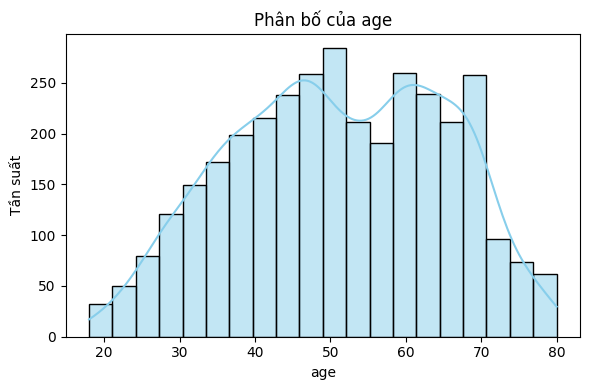

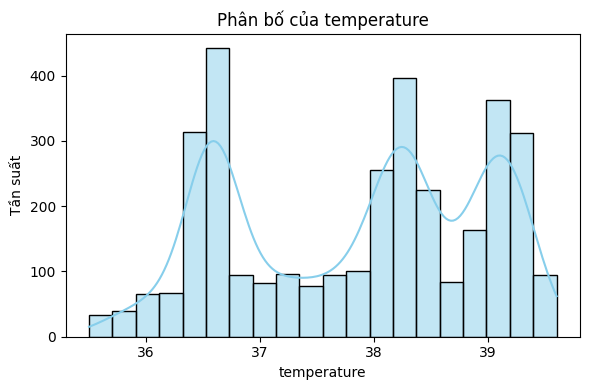

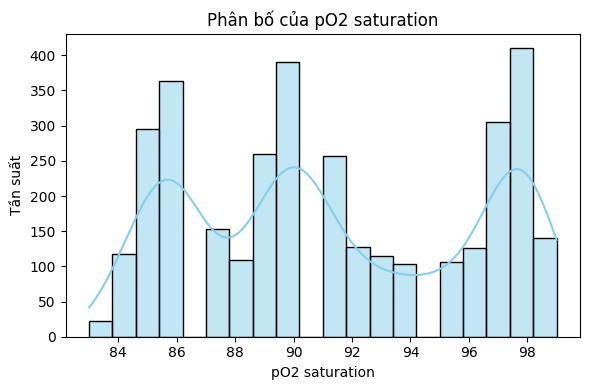

In [25]:
#1️ Histogram cho các cột số
num_cols = ['age', 'temperature', 'pO2 saturation']
for col in num_cols:
   plt.figure(figsize=(6,4))
   sns.histplot(df[col], kde=True, bins=20, color='skyblue')
   plt.title(f'Phân bố của {col}')
   plt.xlabel(col)
   plt.ylabel('Tần suất')
   plt.tight_layout()
   plt.savefig(output_path + f"hist_{col.replace(" " , "_")}" , dpi = 300)
   plt.show()

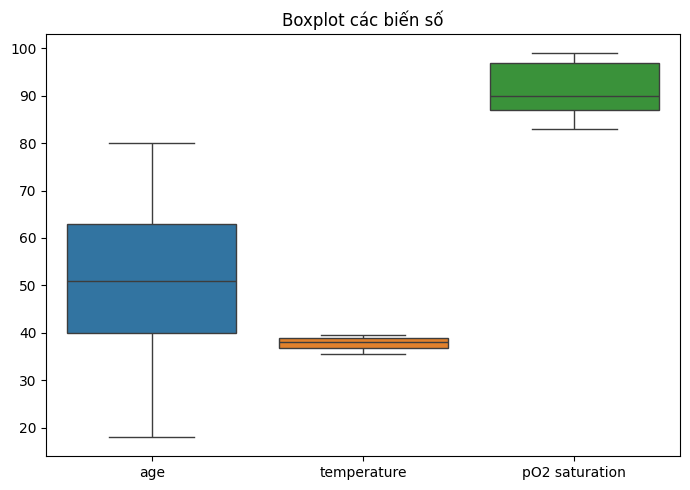

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot các biến số')
plt.tight_layout()
plt.savefig(output_path + f"boxplot_variables" , dpi = 300)


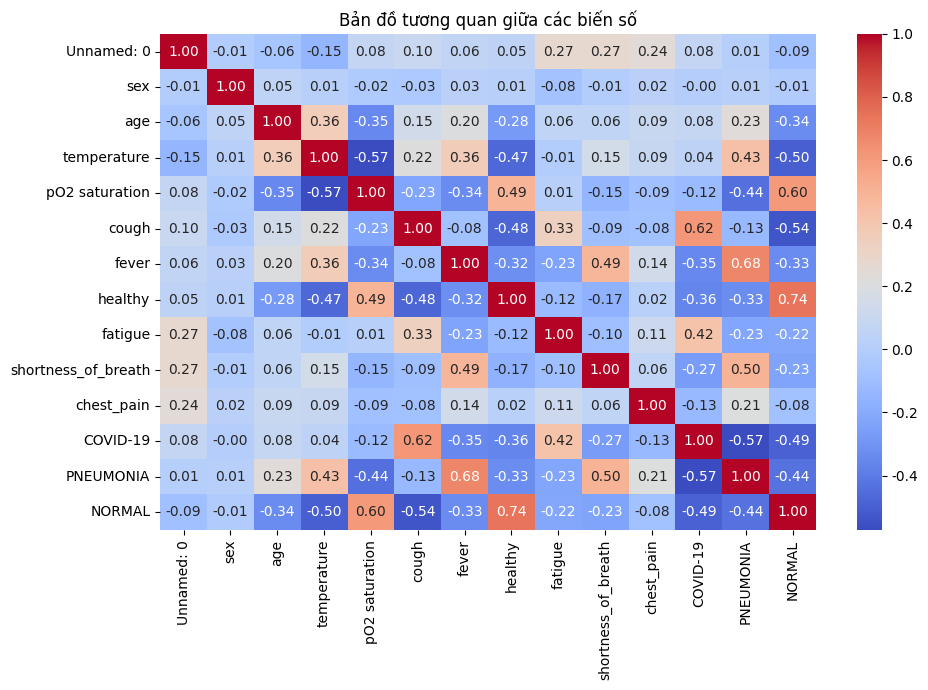

In [22]:
corr = df.select_dtypes(include=['number', 'bool']).corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Bản đồ tương quan giữa các biến số')
plt.tight_layout()
plt.savefig(output_path + f"correlation_map" , dpi = 300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16540\2477952250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='viridis')


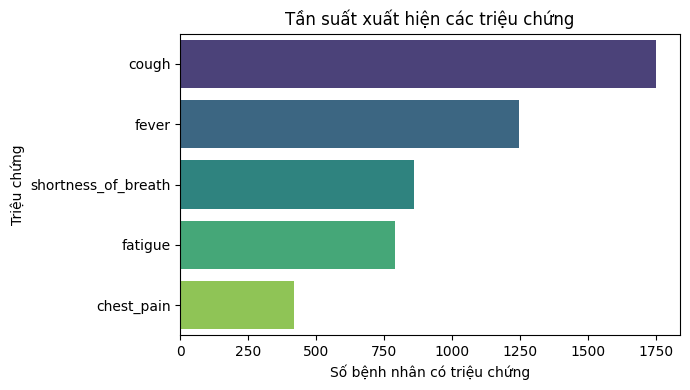

In [26]:
symptoms = ['cough', 'fever', 'fatigue', 'shortness_of_breath', 'chest_pain']
symptom_counts = df[symptoms].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='viridis')
plt.title('Tần suất xuất hiện các triệu chứng')
plt.xlabel('Số bệnh nhân có triệu chứng')
plt.ylabel('Triệu chứng')
plt.tight_layout()
plt.savefig(output_path + f"symptom_frequency" , dpi = 300)
plt.show()

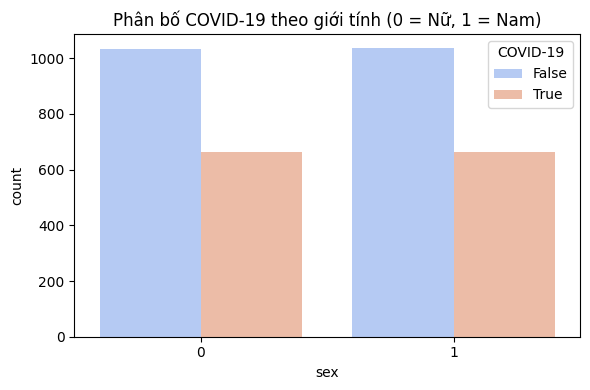

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='COVID-19', palette='coolwarm')
plt.title('Phân bố COVID-19 theo giới tính (0 = Nữ, 1 = Nam)')
plt.tight_layout()
plt.savefig(output_path + f"covid_distribution_gender" , dpi = 300)
plt.show()

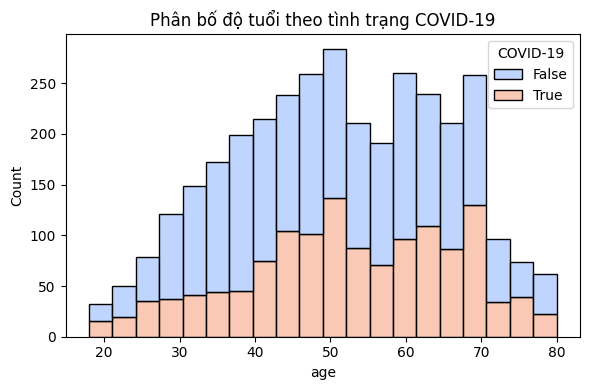

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='COVID-19', multiple='stack', bins=20, palette='coolwarm')
plt.title('Phân bố độ tuổi theo tình trạng COVID-19')
plt.tight_layout()
plt.savefig(output_path + f"covid_distribution_age" , dpi = 300)
plt.show()

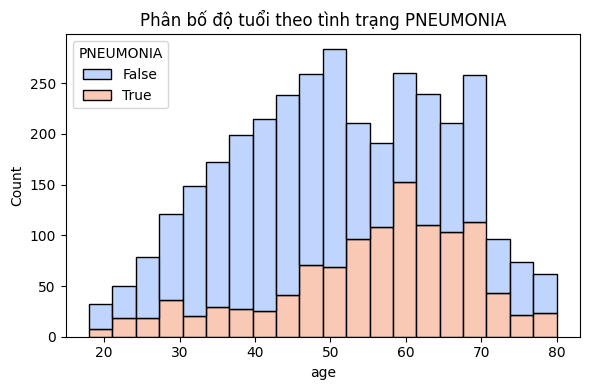

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='PNEUMONIA', multiple='stack', bins=20, palette='coolwarm')
plt.title('Phân bố độ tuổi theo tình trạng PNEUMONIA')
plt.savefig(output_path + f"pneu_distribution_gender" , dpi = 300)
plt.tight_layout()
plt.show()

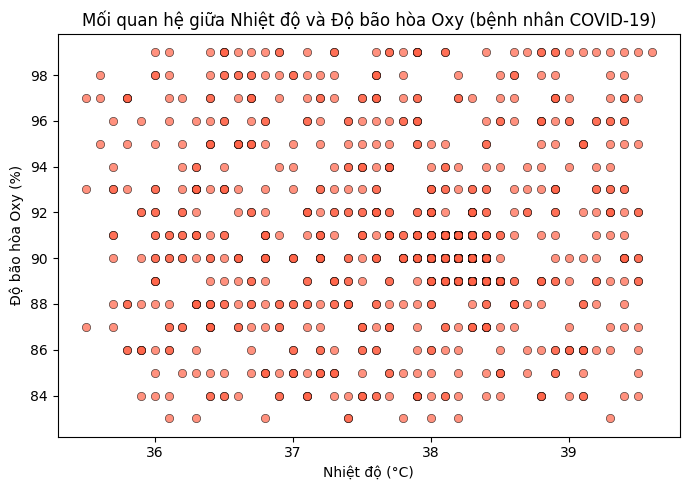

In [33]:
# Lọc dữ liệu chỉ gồm bệnh nhân mắc COVID-19
df_covid = df[df['COVID-19'] == True]

# Tạo biểu đồ scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_covid,
    x='temperature',
    y='pO2 saturation',
    color='tomato',
    alpha=0.7,
    edgecolor='black'
)

# Thêm tiêu đề và nhãn trục
plt.title('Mối quan hệ giữa Nhiệt độ và Độ bão hòa Oxy (bệnh nhân COVID-19)')
plt.xlabel('Nhiệt độ (°C)')
plt.ylabel('Độ bão hòa Oxy (%)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.savefig(output_path + f"covid_scatter_temperature_vs_o2" , dpi = 300)
plt.show()

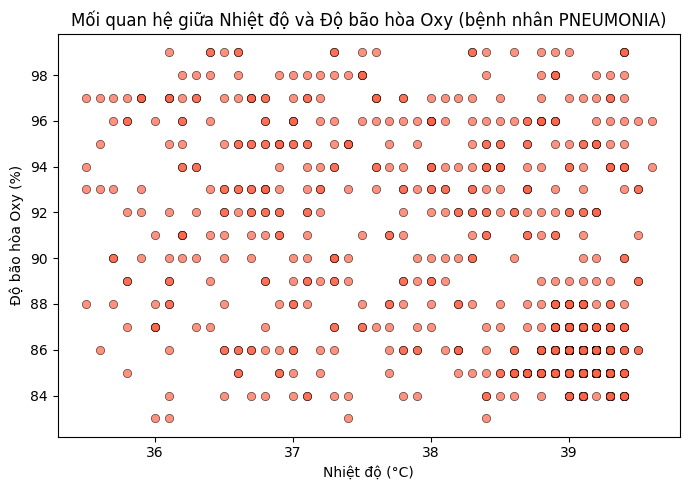

In [35]:
# Lọc dữ liệu chỉ gồm bệnh nhân mắc COVID-19
df_covid = df[df['PNEUMONIA'] == True]

# Tạo biểu đồ scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_covid,
    x='temperature',
    y='pO2 saturation',
    color='tomato',
    alpha=0.7,
    edgecolor='black'
)

# Thêm tiêu đề và nhãn trục
plt.title('Mối quan hệ giữa Nhiệt độ và Độ bão hòa Oxy (bệnh nhân PNEUMONIA)')
plt.xlabel('Nhiệt độ (°C)')
plt.ylabel('Độ bão hòa Oxy (%)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.savefig(output_path + f"pneu_scatter_temperature_vs_o2" , dpi = 300)
plt.show()